# Implmentation of low rate targetted DDos attacks (LSTM)

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_attack="/content/drive/Shareddrives/EE706_Project/dataset/ids_iscx_2012_dataset-master (1)/ids_iscx_2012_dataset-master/dataset_attack.csv"
path_normal="/content/drive/Shareddrives/EE706_Project/dataset/ids_iscx_2012_dataset-master (1)/ids_iscx_2012_dataset-master/dataset_normal.csv"
data_attack=pd.read_csv(path_attack, nrows=60000)
data_normal=pd.read_csv(path_normal,nrows=60000)

Extracting useful features

In [ ]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

Standardizing the data

In [ ]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))
for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp   

In [ ]:
len(Y[25:]),len(I)

(119975, 119975)

Splitting the data and initializing LSTM model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:], test_size = 0.3,shuffle=True)
Y_train=np.array(Y_train,dtype=np.float32)
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, Y_train, epochs = 60,validation_split=0.2, verbose = 1)

Epoch 1/60
2100/2100 [==============================] - 19s 7ms/step - loss: 0.3131 - accuracy: 0.9254 - val_loss: 0.2195 - val_accuracy: 0.9470
Epoch 2/60
2100/2100 [==============================] - 15s 7ms/step - loss: 0.1902 - accuracy: 0.9517 - val_loss: 0.1801 - val_accuracy: 0.9525
Epoch 3/60
2100/2100 [==============================] - 14s 7ms/step - loss: 0.1713 - accuracy: 0.9575 - val_loss: 0.2479 - val_accuracy: 0.9300
Epoch 4/60
2100/2100 [==============================] - 14s 7ms/step - loss: 0.1644 - accuracy: 0.9596 - val_loss: 0.1504 - val_accuracy: 0.9627
Epoch 5/60
2100/2100 [==============================] - 14s 7ms/step - loss: 0.1556 - accuracy: 0.9624 - val_loss: 0.1482 - val_accuracy: 0.9633
Epoch 6/60
2100/2100 [==============================] - 14s 7ms/step - loss: 0.1515 - accuracy: 0.9635 - val_loss: 0.1859 - val_accuracy: 0.9577
Epoch 7/60
2100/2100 [==============================] - 14s 7ms/step - loss: 0.1538 - accuracy: 0.9629 - val_loss: 0.1433 - val_ac

In [ ]:
model.save("/content/drive/Shareddrives/EE706_Project/dataset/Epoch_40.h5")

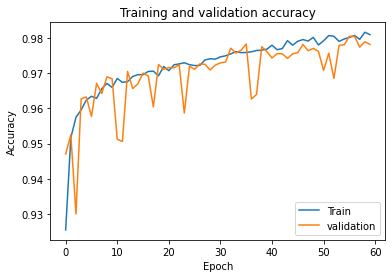

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='lower right')
plt.savefig('/content/drive/Shareddrives/EE706_Project/dataset/acc.png')
plt.show()

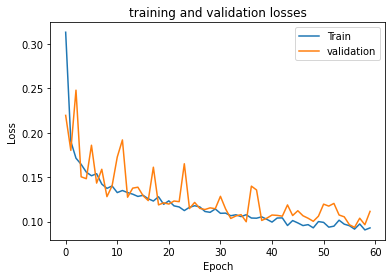

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training and validation losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper right')
plt.savefig('/content/drive/Shareddrives/EE706_Project/dataset/loss_plot.png')
plt.show()


1125/1125 [==============================] - 3s 2ms/step


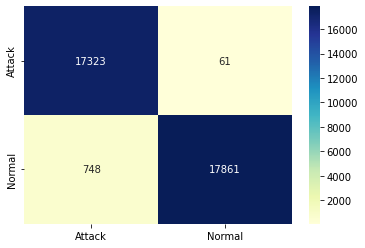

In [ ]:
predict = model.predict(X_test, verbose=1)
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d",cmap='YlGnBu')

In [ ]:
Y_test=np.array(Y_test,dtype=np.float32)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))
figure = ax.get_figure()    
figure.savefig('/content/drive/Shareddrives/EE706_Project/dataset/heatmap.png', dpi=500)

accuracy: 97.752%
